# Training of a Feed Forward Neural Network for two Regression Outputs with Tensorflow:

Temperature Data obtained from the University of California Irvine Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Bias+correction+of+numerical+prediction+model+temperature+forecast

FILES REQUIRED: Upload a temperature.xlsx file to the directory.

FILES GENERATED: The .h5 (parameters of the NN) and the .json (structure of the NN), and a .pkl file with input data for a request to submit through the API.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import  train_test_split

import tensorflow as tf
import pandas as pd

In [2]:
# Get the raw data:
raw_data = pd.read_excel("temperature.xlsx", engine='openpyxl', header=0)
raw_data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
# Drop NaN rows:
clean_data = raw_data.dropna(axis='rows')
print("Before: ", raw_data.shape)
print("After: ", clean_data.shape)

Before:  (7752, 24)
After:  (7588, 24)


In [4]:
# Select the X matrix (input data), and the y vector (output data):
X = clean_data.values[1:,:22].astype('float32')
Y = clean_data.values[1:,22:].astype('float32')

In [5]:
# Let us print their shape:
print(" Shape of X: ", X.shape)
print(" Shape of Y: ", Y.shape)

 Shape of X:  (7587, 22)
 Shape of Y:  (7587, 2)


In [6]:
# Separate in training and validation:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y,test_size=0.2,random_state=79)

# Scale the data with the information of the training set:
scaler_X = MinMaxScaler()
scaler_X.fit(X_train)
Xs_train = scaler_X.transform(X_train)
Xs_valid = scaler_X.transform(X_valid)

scaler_Y = MinMaxScaler()
scaler_Y.fit(Y_train)
Ys_train = scaler_Y.transform(Y_train)
Ys_valid = scaler_Y.transform(Y_valid)

In [7]:
# Create the model:
user_model = tf.keras.Sequential([
             tf.keras.layers.Dense(300, activation='relu'),
             tf.keras.layers.Dropout(.2),
             tf.keras.layers.Dense(300, activation='selu'),
             tf.keras.layers.Dropout(.2),
             tf.keras.layers.Dense(20, activation='swish'),
             tf.keras.layers.Dense(2, activation="sigmoid")
            ])

In [8]:
# Compile the user_model, choose the loss and the optimizer method:
user_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                   loss=tf.keras.losses.MeanSquaredError(),
                   metrics=['accuracy'])

In [9]:
# Number of epochs:
E=100

In [10]:
# Train the Neural Network, store the history of the training:
history = user_model.fit(Xs_train, Ys_train, epochs=E,
                    validation_data=(Xs_valid, Ys_valid),
                    verbose=1)

Epoch 1/100
190/190 [==============================] - 8s 15ms/step - loss: 0.0234 - accuracy: 0.5329 - val_loss: 0.0190 - val_accuracy: 0.6416
Epoch 2/100
190/190 [==============================] - 2s 8ms/step - loss: 0.0176 - accuracy: 0.6205 - val_loss: 0.0155 - val_accuracy: 0.7312
Epoch 3/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0145 - accuracy: 0.6739 - val_loss: 0.0127 - val_accuracy: 0.7503
Epoch 4/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0124 - accuracy: 0.7032 - val_loss: 0.0107 - val_accuracy: 0.7523
Epoch 5/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0108 - accuracy: 0.7176 - val_loss: 0.0093 - val_accuracy: 0.7523
Epoch 6/100
190/190 [==============================] - 1s 5ms/step - loss: 0.0100 - accuracy: 0.7247 - val_loss: 0.0084 - val_accuracy: 0.7596
Epoch 7/100
190/190 [==============================] - 1s 6ms/step - loss: 0.0093 - accuracy: 0.7334 - val_loss: 0.0077 - val_accuracy: 0.763

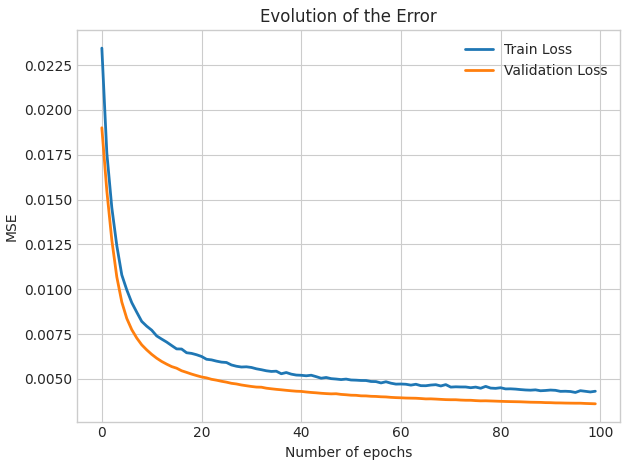

In [16]:
# Plot the evolution of the learning:
with plt.style.context(('seaborn-whitegrid')):
    fig, ax = plt.subplots()

    ax.plot(history.history['loss'], linewidth=2, label='Train Loss')
    ax.plot(history.history['val_loss'], linewidth=2, label='Validation Loss')
    ax.legend()

    ax.set_xlabel('Number of epochs')
    ax.set_ylabel('MSE')
    plt.title('Evolution of the Error')

    plt.tight_layout()
plt.show()

In [12]:
# Predict with the user_model for the training set:
Ys_train_pred_NN = user_model.predict(Xs_train)

# Get the metrics:
tr_rmse = np.sqrt(mean_squared_error(Ys_train, Ys_train_pred_NN))
tr_mae = mean_absolute_error(Ys_train, Ys_train_pred_NN)
tr_r2 = r2_score(Ys_train, Ys_train_pred_NN)
print(f"For training: RMSE: {tr_rmse}, MAE: {tr_mae}, R2: {tr_r2}")

# Predict with the user_model for the validation set:
Ys_valid_pred_NN = user_model.predict(Xs_valid)

# Get the metrics:
vl_rmse = np.sqrt(mean_squared_error(Ys_valid, Ys_valid_pred_NN))
vl_mae = mean_absolute_error(Ys_valid, Ys_valid_pred_NN)
vl_r2 = r2_score(Ys_valid, Ys_valid_pred_NN)
print(f"For validation: RMSE: {vl_rmse}, MAE: {vl_mae}, R2: {vl_r2}")

190/190 [==============================] - 0s 2ms/step
For training: RMSE: 0.059465207159519196, MAE: 0.04575008153915405, R2: 0.8253076994534718
48/48 [==============================] - 0s 2ms/step
For validation: RMSE: 0.060089726001024246, MAE: 0.04604657366871834, R2: 0.8269909951848332


Text(0, 0.5, 'Truth')

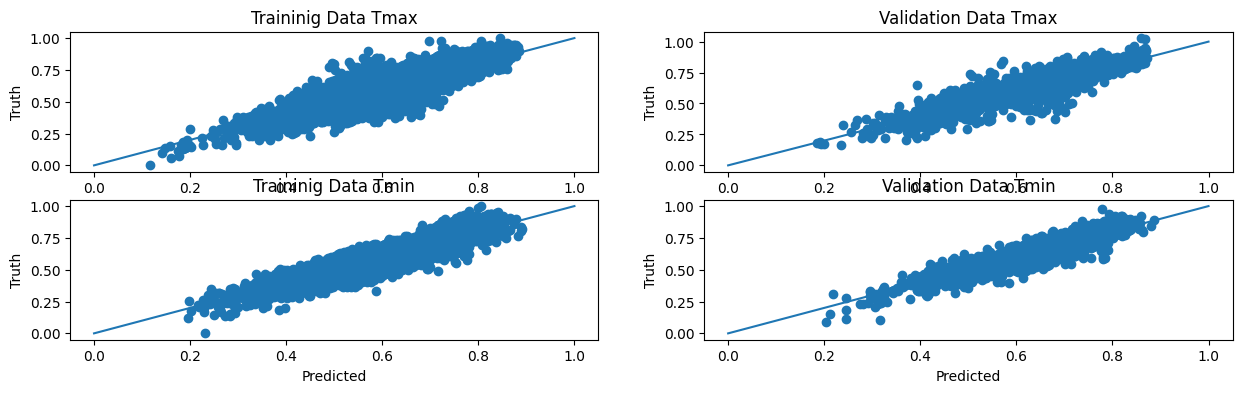

In [13]:
# Plots to see how the prediction compares to the ground truth:
fig, axs = plt.subplots(2, 2, figsize=(15, 4))

# Scatterplot:
axs[0,0].scatter(Ys_train_pred_NN[:,0], Ys_train[:,0])
axs[0,0].plot([0,1],[0,1])
axs[0,0].set_title('Traininig Data Tmax')
axs[0,0].set_xlabel("Predicted")
axs[0,0].set_ylabel("Truth")

# Scatterplot:
axs[0,1].scatter(Ys_valid_pred_NN[:,0], Ys_valid[:,0])
axs[0,1].plot([0,1],[0,1])
axs[0,1].set_title('Validation Data Tmax')
axs[0,1].set_xlabel("Predicted")
axs[0,1].set_ylabel("Truth")

# Scatterplot:
axs[1,0].scatter(Ys_train_pred_NN[:,1], Ys_train[:,1])
axs[1,0].plot([0,1],[0,1])
axs[1,0].set_title('Traininig Data Tmin')
axs[1,0].set_xlabel("Predicted")
axs[1,0].set_ylabel("Truth")

# Scatterplot:
axs[1,1].scatter(Ys_valid_pred_NN[:,1], Ys_valid[:,1])
axs[1,1].plot([0,1],[0,1])
axs[1,1].set_title('Validation Data Tmin')
axs[1,1].set_xlabel("Predicted")
axs[1,1].set_ylabel("Truth")

# Save Model

In [14]:
# Serialize the user_model to JSON
user_model_in_json = user_model.to_json()
with open("user_model_structure.json", "w") as json_file:
    json_file.write(user_model_in_json)

# Serialize weights and biases to HDF5
user_model.save_weights("user_model_parameters.h5")

# Save the Data to Simulate a Future Request from the User

In [15]:
# We will simply use the Xs of the validation set for a future request:
df = pd.DataFrame(Xs_valid, index=None, columns=None)
df.to_csv('input_data_for_the_request.csv', index=True, columns=None)